## Main questions worth answering

- Make sure that there is no overlap between examples in train, valid and test
- Check whether the sets are well ballanced - enough examples per lable
- Check whether examples for valid and test sets were chosen at random and have % of examples per entity similar to one in train set
- Check that there are enough samples in valid set and in test set
- Check whether there are major tockenization problems

# Install libraries for data exploration

Whether we decide to use Spacy for training or not, Spacy is usefull for data exploration.

In [1]:
!pip install spacy==v2.2.4

In [2]:
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


# Load data

Load raw dataset

In [4]:
# download the train, valid and test files from github:
!wget https://raw.githubusercontent.com/natalyasegal/spacy_ner_conll2003_en/master/ner_proj/data/train.txt
!wget https://raw.githubusercontent.com/natalyasegal/spacy_ner_conll2003_en/master/ner_proj/data/valid.txt
!wget https://raw.githubusercontent.com/natalyasegal/spacy_ner_conll2003_en/master/ner_proj/data/test.txt

--2020-09-28 13:52:03--  https://raw.githubusercontent.com/natalyasegal/spacy_ner_conll2003_en/master/ner_proj/data/train.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3283418 (3.1M) [text/plain]
Saving to: ‘train.txt’

train.txt           100%[===================>]   3.13M  13.8MB/s    in 0.2s    

2020-09-28 13:52:04 (13.8 MB/s) - ‘train.txt’ saved [3283418/3283418]

--2020-09-28 13:52:04--  https://raw.githubusercontent.com/natalyasegal/spacy_ner_conll2003_en/master/ner_proj/data/valid.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Le

In [13]:
# download the train, valid and test samples csv files from github (format ):
!wget https://raw.githubusercontent.com/natalyasegal/spacy_ner_conll2003_en/master/ner_proj/data/train_freq.csv
!wget https://raw.githubusercontent.com/natalyasegal/spacy_ner_conll2003_en/master/ner_proj/data/valid_freq.csv
!wget https://raw.githubusercontent.com/natalyasegal/spacy_ner_conll2003_en/master/ner_proj/data/test_freq.csv

--2020-09-28 14:20:05--  https://raw.githubusercontent.com/natalyasegal/spacy_ner_conll2003_en/master/ner_proj/data/train_freq.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3516759 (3.4M) [text/plain]
Saving to: ‘train_freq.csv’

train_freq.csv      100%[===================>]   3.35M  14.3MB/s    in 0.2s    

2020-09-28 14:20:06 (14.3 MB/s) - ‘train_freq.csv’ saved [3516759/3516759]

--2020-09-28 14:20:06--  https://raw.githubusercontent.com/natalyasegal/spacy_ner_conll2003_en/master/ner_proj/data/valid_freq.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting r

# Imports

In [5]:
import spacy
from spacy import displacy #for visualization
spacy.info()


============================== Info about spaCy ==============================

spaCy version    2.2.4                         
Location         /usr/local/lib/python3.6/dist-packages/spacy
Platform         Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic
Python version   3.6.9                         
Models           en                            



{'Location': '/usr/local/lib/python3.6/dist-packages/spacy',
 'Models': 'en',
 'Platform': 'Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic',
 'Python version': '3.6.9',
 'spaCy version': '2.2.4'}

In [10]:
import pandas as pd

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline

# Explore dataset

Use Spacy CLI to convert to json as it is an input format Spacy can use while analysibg data 

In [6]:
!mkdir conll2003_json
!python -m spacy convert -c ner -b en -n 10 train.txt conll2003_json
!python -m spacy convert -c ner -b en -n 10 valid.txt conll2003_json
!python -m spacy convert -c ner -b en -n 10 test.txt conll2003_json

ℹ Auto-detected token-per-line NER format
ℹ Grouping every 10 sentences into a document.
✔ Generated output file (1499 documents): conll2003_json/train.json
ℹ Auto-detected token-per-line NER format
ℹ Grouping every 10 sentences into a document.
✔ Generated output file (347 documents): conll2003_json/valid.json
ℹ Auto-detected token-per-line NER format
ℹ Grouping every 10 sentences into a document.
✔ Generated output file (369 documents): conll2003_json/test.json


Perform comparoson of training and validation sets

In [7]:
!python -m spacy debug-data en conll2003_json/train.json conll2003_json/valid.json -b en -V 


=========================== Data format validation ===========================
✔ Corpus is loadable

=============================== Training stats ===============================
Training pipeline: tagger, parser, ner
Starting with base model 'en'
1499 training docs
347 evaluation docs
✔ No overlap between training and evaluation data

============================== Vocab & Vectors ==============================
ℹ 204567 total words in the data (23624 unique)
10 most common words: '.' (7374), ',' (7290), 'the' (7243), 'of' (3751), 'in'
(3398), 'to' (3382), 'a' (2994), '(' (2861), ')' (2861), 'and' (2838)
ℹ No word vectors present in the model

========================== Named Entity Recognition ==========================
ℹ 2 new labels, 2 existing labels
0 missing values (tokens with '-' label)
New: 'LOC' (7140), 'PER' (6600), 'ORG' (6321), 'MISC' (3438)
Existing: 'LOC', 'ORG'
⚠ 15 entity span(s) with punctuation
✔ Good amount of examples for all labels
✔ Examples without occurrences

Perform comparison of training and test sets

In [8]:
!python -m spacy debug-data en conll2003_json/train.json conll2003_json/test.json -b en -V 


=========================== Data format validation ===========================
✔ Corpus is loadable

=============================== Training stats ===============================
Training pipeline: tagger, parser, ner
Starting with base model 'en'
1499 training docs
369 evaluation docs
✔ No overlap between training and evaluation data

============================== Vocab & Vectors ==============================
ℹ 204567 total words in the data (23624 unique)
10 most common words: '.' (7374), ',' (7290), 'the' (7243), 'of' (3751), 'in'
(3398), 'to' (3382), 'a' (2994), '(' (2861), ')' (2861), 'and' (2838)
ℹ No word vectors present in the model

========================== Named Entity Recognition ==========================
ℹ 2 new labels, 2 existing labels
0 missing values (tokens with '-' label)
New: 'LOC' (7140), 'PER' (6600), 'ORG' (6321), 'MISC' (3438)
Existing: 'LOC', 'ORG'
⚠ 15 entity span(s) with punctuation
✔ Good amount of examples for all labels
✔ Examples without occurrences

Key takeaways form the results above are:
- No overlap between training and evaluation data
- Good amount of examples for all labels

Found several minor problems to pay attention later:
- Label '(', ')' and '"' not found in tag map for language 'en' . Caused by token per line approach. Check whether it's worth fixing.
- Label '-X-' not found in tag map for language 'en'. Relates to the 1st line of the documents. Probably won't affect the results is not cleaned
- Label 'NN|SYM' not found in tag map for language 'en'. Looks like a tokenization problem with limited effect on the dataset at hand. 

# Answer the remaining question

So we have answers for two questions and are left with the following questions:
- Check whether examples for valid and test sets were chosen at random and have % of examples per entity similar to one in train set
- Check that there are enough samples in valid set and in test set

In [15]:
train_freq = pd.read_csv('train_freq.csv')
valid_freq = pd.read_csv('valid_freq.csv')
test_freq = pd.read_csv('test_freq.csv')

In [16]:
train_freq.head()

,token,pos,chunk,lable
0,EU,NNP,B-NP,B-ORG
1,rejects,VBZ,B-VP,O
2,German,JJ,B-NP,B-MISC
3,call,NN,I-NP,O
4,to,TO,B-VP,O


What percent of the whole number of entities are in validation and test sets:

In [29]:
all = (len(valid_freq)+len(train_freq)+len(test_freq))
print("validation: ", 100*len(valid_freq)/all, "%", " test: ", 100*len(test_freq)/all, "%")

validation:  17.03290533935695 %  test:  15.410755330110169 %


Utility to view and plot entities frequencies 

In [23]:
def plot_lables_frequency(vc, tag):
    trlf = pd.DataFrame(vc).reset_index()
    trlf.columns = ['lable', 'count']
    trlf_sub = trlf[trlf.lable != 'O']
    my_plot = trlf_sub[['lable', 'count']].plot(kind='bar',legend=None,title="Lables frequencies " + tag)
    my_plot.set_xlabel("Lables")
    my_plot.set_ylabel("Count")

Training set - value counts of lables and plot of lables without O

O         170523
B-LOC       7140
B-PER       6600
B-ORG       6321
I-PER       4528
I-ORG       3704
B-MISC      3438
I-LOC       1157
I-MISC      1155
Name: lable, dtype: int64


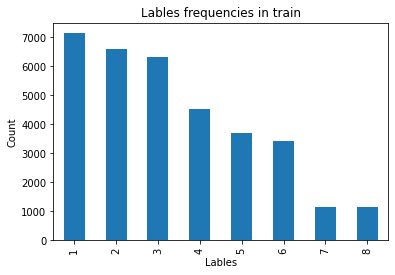

In [25]:
print(train_freq.lable.value_counts())
plot_lables_frequency(train_freq.lable.value_counts(), "in train")

Same for validation set:

O         42974
B-PER      1842
B-LOC      1837
B-ORG      1341
I-PER      1307
B-MISC      922
I-ORG       751
I-MISC      346
I-LOC       257
Name: lable, dtype: int64


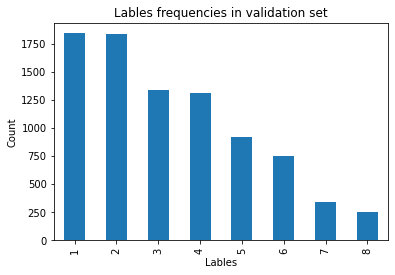

In [27]:
print(valid_freq.lable.value_counts())
plot_lables_frequency(valid_freq.lable.value_counts(), "in validation set")

Same for the test set:

O         38553
B-LOC      1668
B-ORG      1661
B-PER      1617
I-PER      1156
I-ORG       835
B-MISC      702
I-LOC       257
I-MISC      216
Name: lable, dtype: int64


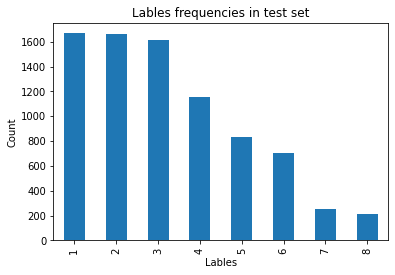

In [28]:
print(test_freq.lable.value_counts())
plot_lables_frequency(test_freq.lable.value_counts(), "in test set")

Key takeaways form the results above are:
- Reasonable % of all the samples are left to validatio and test sets (17% for valid and 15% for test)
- Lables distribution are similar in all 3 sets

# Important questions that we cannot answer now

There are several important questions that we canot answer before gathering data from actual traffic (or data we believe that looks the same ast actual traffic)
- Whether entities frequencies distribution in the Conll2003 dataset is similar to the this distribution in actual traffic
- What would be the Conll2003 pitfall on the actuall traffic. (I would proceed with checking % of first person sentences in actual trafic vs one on Conll2003 when we have data) 